+ This notebook is part of lecture 4 *Factorization into LU* in the OCW MIT course 18.06 [1]
+ Created by me, Dr Juan H Klopper
    + Head of Acute Care Surgery
    + Groote Schuur Hospital
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

![SegmentLocal](KRG_elegant_logo_for_light_BG.png "segment")
![SegmentLocal](UCT_logo.gif "segment")

## Library import

In [2]:
from sympy import init_printing, Matrix, symbols, eye, Rational
init_printing()

# LU decomposition of a matrix A

In this notebook, we will decompose the matrix $A$ into and upper and lower triangular matrix, such that multiplying these will return $A$.  this is shown in (1) where $L$ is the lower triangular matrix and $U$ is the upper triangular matrix.

$$ A = LU \tag{1}$$

## Turning a matrix of coefficients into _Upper triangular_ form

Consider the following matrix of coefficients shown in (2).

$$ \begin{bmatrix} 1 & -2 & 1 \\ 3 & 2 & -2 \\ 6 & -1 & -1 \end{bmatrix}  \tag{2}$$

We need to convert this into upper triangular form.  A generic $ 3 \times 3$ upper triangular matrix is shown in (3).

$$ \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ 0 & a_{22} & a_{23} \\ 0 & 0 & a_{3,3} \end{bmatrix} \tag{3} $$

Note that all entries _below_ the main diagonal are $0$.  This is an _upper triangular matrix_.

To get our matrix in (2) into upper triangular form, successive elementary row operation follow, which remember, is nothing other than matrix multiplication of the elementary matrices.  An elementary matrix is an identity matrix on which one elementary row operation was performed.  below, we create the $3 \times 3$ matrix in (2) and save it as `sympy` matrix object named `A`.

In [3]:
A = Matrix([[1, -2, 1], [3, 2, -2], [6, -1, -1]])
A

⎡1  -2  1 ⎤
⎢         ⎥
⎢3  2   -2⎥
⎢         ⎥
⎣6  -1  -1⎦

The `eye()` function returns an identity matrix.

In [4]:
eye(3)  # Identity matrix of size 3 x 3

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

We have to get a $-3$ in the first _pivot_ (the $1$ in row $1$, column $1$) to get rid of the $3$ in row $2$, column $1$ (we call the resulting elementary matrix `E21`, referring to the row $2$, column $1$).  Then we add the new row $1$ to row $2$.  Row $1$ of the identity matrix is then $\left( -3,0,0 \right) $ (but we leave it as $\left( 1,0,0 \right)$ in `E21`).  Adding this to row $2$ leaves $ \left( -3,1,0 \right) $.

To see why this is so, if we multiply row $1$ by $-3$ we have $ \left( -3, 0, 0 \right) $.  Adding this to row $2$, which is $ \left( 0,1,0 \right) $, results in $ \left( -3,1,0 \right) $ and hence `E21` being what we see below.

In [5]:
E21 = Matrix([[1, 0, 0], [-3, 1, 0], [0, 0, 1]])
E21

⎡1   0  0⎤
⎢        ⎥
⎢-3  1  0⎥
⎢        ⎥
⎣0   0  1⎦

Now we left-multiply $A$ by the elementary matrix `E21`.  In matrix notation, we would write $E_{21} A$.

In [6]:
E21 * A # The resulting matrix after multiplication by E21

⎡1  -2  1 ⎤
⎢         ⎥
⎢0  8   -5⎥
⎢         ⎥
⎣6  -1  -1⎦

Good, we now have a leading $0$ in row $2$.  We follow the same steps to get rid of the leading $6$ in row $3$, column $1$.  Multiplying row $1$ (of the identity matrix) by $-6$ and adding this new row to row $3$ yields elementary matrix `E31`.

In [7]:
E31 = Matrix([[1, 0, 0], [0, 1, 0], [-6, 0, 1]])
E31

⎡1   0  0⎤
⎢        ⎥
⎢0   1  0⎥
⎢        ⎥
⎣-6  0  1⎦

Now for the left-multiplication of $E_{21} A$ by `E31` so that we have $E_{31} E_{21} A$.

In [8]:
E31 * E21 * A # This got rid of the leading 6 in row 3

⎡1  -2  1 ⎤
⎢         ⎥
⎢0  8   -5⎥
⎢         ⎥
⎣0  11  -7⎦

Now the $11$ in row $3$, column $2$ is the _pivot_ and we also need to get rid of the $8$ in row $2$, column $2$.  Unfortunately, we have an $8$ and an $11$ to deal with.  We will have to do two elementary row operations.  First $-11$ times row $2$ of the identity matrix $ \therefore \left( 0,-11,0 \right) $,  added to $8$ times row $3$ $ \therefore \left( 0,0,8 \right) $) such that we have $ \left( 0,-11,8 \right) $.  Below it is save as `E32`.

In [11]:
E32 = Matrix([[1, 0 , 0], [0, 1, 0], [0, -11, 8]])
E32

⎡1   0   0⎤
⎢         ⎥
⎢0   1   0⎥
⎢         ⎥
⎣0  -11  8⎦

In [12]:
U = E32 * E31 * E21 * A
U # We call is U for upper triangular

⎡1  -2  1 ⎤
⎢         ⎥
⎢0  8   -5⎥
⎢         ⎥
⎣0  0   -1⎦

The matrix is now in upper triangular form, achived by the elementary matrixes shown in (4).

$$ { E }_{ 32 } { E }_{ 31 } { E }_{ 21 } A=U \tag{4} $$

## Calculating the _Lower triangular_ from

Note, to reverse the process above, we would have to do the multiplication shown in (5).

$$ { \left( { E }_{ 21 } \right)  }^{ -1 }{ \left( { E }_{ 31 } \right)  }^{ -1 }{ \left( { E }_{ 32 } \right)  }^{ -1 }\left( { E }_{ 32 } \right) \left( { E }_{ 31 } \right) \left( { E }_{ 21 } \right) A=A \tag{5} $$

The inverse of a matrix can be calculated using the `sympy` method `.inv()`.

We can check this with a Boolean logic, using the `==` symbol, which checks if the left- and right-hand sides re equal.

In [13]:
E21.inv() * E31.inv() * E32.inv() * E32 * E31 * E21 * A == A # The Boolean double equal signs asks: Is the
# left-hand side equal to the right-hand side?

True

We will be back with the identity matrix just multiplying the inverse elementary matrices and the elementary matrices.

In [14]:
E21.inv() * E31.inv() * E32.inv() * E32 * E31 * E21

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

We left-multiply both sides of (4) by these inverse elementary matrices as shown in (6).

$$ { \left( { E }_{ 21 } \right)  }^{ -1 }{ \left( { E }_{ 31 } \right)  }^{ -1 }{ \left( { E }_{ 32 } \right)  }^{ -1 }\left( { E }_{ 32 } \right) \left( { E }_{ 31 } \right) \left( { E }_{ 21 } \right) A={ \left( { E }_{ 21 } \right)  }^{ -1 }{ \left( { E }_{ 31 } \right)  }^{ -1 }{ \left( { E }_{ 32 } \right)  }^{ -1 }U \tag{6} $$

The multiplication of these inverse elementary matrices results in a _l_ower triangular matrix, $L$, such that we have (1).

In [15]:
L = E21.inv() * E31.inv() * E32.inv()
L

⎡1   0     0 ⎤
⎢            ⎥
⎢3   1     0 ⎥
⎢            ⎥
⎣6  11/8  1/8⎦

Let's check if this is so.

In [16]:
A == L * U # Checking this with a Boolean question

True

In [17]:
A, L * U # They are identical

⎛⎡1  -2  1 ⎤  ⎡1  -2  1 ⎤⎞
⎜⎢         ⎥  ⎢         ⎥⎟
⎜⎢3  2   -2⎥, ⎢3  2   -2⎥⎟
⎜⎢         ⎥  ⎢         ⎥⎟
⎝⎣6  -1  -1⎦  ⎣6  -1  -1⎦⎠

## Doing this in one go using sympy

The `sympy` library provides the `.LUdecomposition()` method for rectangular matrices.  It returns three values.

In [18]:
L, U, _ = A.LUdecomposition()

In [19]:
L

⎡1   0    0⎤
⎢          ⎥
⎢3   1    0⎥
⎢          ⎥
⎣6  11/8  1⎦

In [20]:
U # Note the difference from the U above

⎡1  -2   1  ⎤
⎢           ⎥
⎢0  8    -5 ⎥
⎢           ⎥
⎣0  0   -1/8⎦

Note the subtle difference between this $U$ and the one calculated above.  It simply has row $3$ divided by $8$.  It makes no difference as shown below.

In [21]:
L * U # Back to A

⎡1  -2  1 ⎤
⎢         ⎥
⎢3  2   -2⎥
⎢         ⎥
⎣6  -1  -1⎦

### What's special about L?

Our methods only works when no row interchange happens.  It also actually only works when doing the conventional subtracting the scalar multiplication of a row from another row, leaving the positive scalar.  (This is opposed to the negatives I often use in my head, allowing me to add the two rows).

Note the $3$ (in row $2$, column $1$) and the $6$ (in row $3$, column $1$).  They are the row multiplications we have to do for `E21` and `E31`.  The 
$\frac{11}{8}$ is what we did for `E32` (we just did it in two steps so as not to use fractions).

## Row exchanges

Sometimes, we have to allow row exchanges, i.e. if the pivot contains a $0$.

As an example, from a $ 3 \times 3 $ identity matrix we could have the following.

In [22]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Exchanging rows $1$ and $2$.

In [23]:
Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]])

⎡0  1  0⎤
⎢       ⎥
⎢1  0  0⎥
⎢       ⎥
⎣0  0  1⎦

In [24]:
A, Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]]) * A # Showing row exchange

⎛⎡1  -2  1 ⎤  ⎡3  2   -2⎤⎞
⎜⎢         ⎥  ⎢         ⎥⎟
⎜⎢3  2   -2⎥, ⎢1  -2  1 ⎥⎟
⎜⎢         ⎥  ⎢         ⎥⎟
⎝⎣6  -1  -1⎦  ⎣6  -1  -1⎦⎠

By the way, how many permutations of row exchanges are there?  This answer is $n!$, where $n$ is the number of rows.

## Example problems

### Example problem 01

1. Perform LU decomposition of:
$$  \begin{bmatrix} 1 & 0 & 1 \\ a & a & a \\ b & b & a \end{bmatrix} $$

2. For which values of $a$ and $b$ does $L$ and $U$ exist?

In [31]:
a, b = symbols('a b')
A = Matrix([[1, 0, 1], [a, a, a], [b, b, a]])
L, U, _ = A.LUdecomposition()
L, U

⎛⎡1  0  0⎤               ⎞
⎜⎢       ⎥  ⎡1  0    1  ⎤⎟
⎜⎢a  1  0⎥  ⎢           ⎥⎟
⎜⎢       ⎥, ⎢0  a    0  ⎥⎟
⎜⎢   b   ⎥  ⎢           ⎥⎟
⎜⎢b  ─  1⎥  ⎣0  0  a - b⎦⎟
⎝⎣   a   ⎦               ⎠

#### Solution

In [28]:
a, b = symbols('a b')

In [29]:
A = Matrix([[1, 0, 1], [a, a, a], [b, b, a]])
A

⎡1  0  1⎤
⎢       ⎥
⎢a  a  a⎥
⎢       ⎥
⎣b  b  a⎦

In [30]:
L,U, _ = A.LUdecomposition()

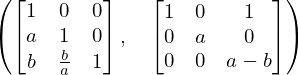

In [29]:
L, U

Checking.

In [30]:
L * U == A

True

For existence it is clear that $ a \ne 0 $.  Not only for the division by $0$, but because we will have a row of $0$'s and a $0$ in the pivot position, row $2$, column $2$.  Furthermore, $a \ne b$, for the same reasons.

## Hints and tips

In [32]:
E21, E21.inv()

⎛⎡1   0  0⎤  ⎡1  0  0⎤⎞
⎜⎢        ⎥  ⎢       ⎥⎟
⎜⎢-3  1  0⎥, ⎢3  1  0⎥⎟
⎜⎢        ⎥  ⎢       ⎥⎟
⎝⎣0   0  1⎦  ⎣0  0  1⎦⎠

To take the inverse of an elementary matrix, simply change the sign of the off-diagonal elements and multiply each element by 1 over the determinant (more about the determinant later).  The determinant is easy to do for these $ n=3 $ square matrices, since the top row is $ \left( 1,0,0 \right) $.

In [33]:
E32, E32.inv()

⎛⎡1   0   0⎤  ⎡1   0     0 ⎤⎞
⎜⎢         ⎥  ⎢            ⎥⎟
⎜⎢0   1   0⎥, ⎢0   1     0 ⎥⎟
⎜⎢         ⎥  ⎢            ⎥⎟
⎝⎣0  -11  8⎦  ⎣0  11/8  1/8⎦⎠

By keeping track of the elementary matrices it is easy to get $L$ and $U$.  It is also easy to get the inverses of $L$ and $U$.  This means it is easy to calculate the values of a column vector $ \mathbf{x} $ when we have $ A \mathbf{x} = \mathbf{b} $ as shown in (7).

$$ \begin{align} Ax &= LUx=b\\ Ux &= { L }^{ -1 }b\\ x &= { U }^{ -1 }{ L }^{ -1 }b \end{align} \tag{7} $$